Cluster data	Samples: 250.00


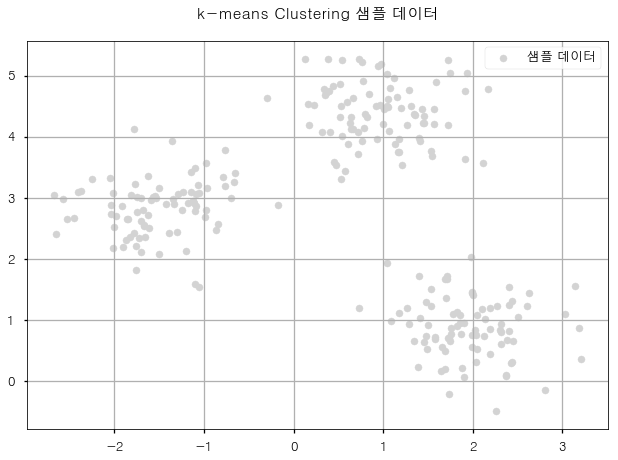

In [24]:
# k-means 클러스터링
# 150개의 샘플 데이터를 3개의 클러스터로 구분하여 분포하도록 만들어주는 코드

%matplotlib inline
#import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

# 회귀 분석 - 선형 회귀
from sklearn.linear_model import LinearRegression

#회귀 분석 - 다항 회귀
from sklearn.preprocessing import PolynomialFeatures

# MSE : 평균제곱오차, 작을 수록 오차가 작다.
# R2 : 결정 계수, 1에 가까울 수록 적합도가 좋음 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 회귀 분석 - 의사결정트리/랜덤포레스트
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# 교차 검증(Cross Vaildation)
from sklearn.cross_validation import train_test_split

# k-means 클러스터링
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from matplotlib import cm


style.use('seaborn-talk')

krfont = {'family':'HYGothic-Medium', 'weight':'bold', 'size':10}
matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus'] = False

samples = 250

X, y = make_blobs(n_samples=samples, n_features=2, centers=3, cluster_std=0.5,
                 shuffle=True, random_state=0)


print('Cluster data\tSamples: %.2f' %(samples))


plt.scatter(X[:, 0], X[:, 1], label='샘플 데이터', c='lightgray', marker='o', s=50)

#plt.plot(X[sort_idx], y_dt_pred, linestyle='--', label='Decision tree, $R^2=%.2f$' %r2_dt, c='blue', lw=2)

#plt.xlabel('인구의 낮은 백분율[LSTAT]')
#plt.ylabel('1000달러 단위 주택가격[MEDV]')
plt.title('k-means Clustering 샘플 데이터\n')
plt.grid(True)
plt.legend()
plt.show()


Cluster	개수: 3.00


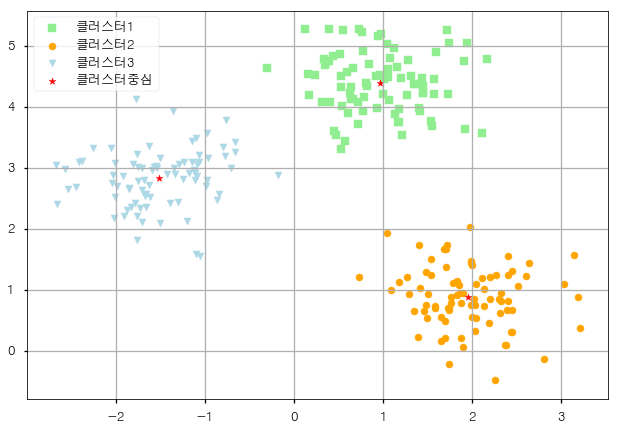

In [20]:

# init_centroid : 초기 클러스터 중심을 선택하는 방법을 지정해주는 변수
# 'random' 이면 초기 클러스터의 중심을 임의로 선택하라는 의미이며,
# 이 값이 'k-means++' 이면 초기 클러스터의 중심을 k-means++를 이용해 선택한다.
init_centroid = 'random'
#init_centroid = 'k-means++'

cluster = 3

# KMeans는 scikit-learn이 제공하는 k-means 클러스터링 API다.
# n_cluster: 클러스터의 개수 k 값을 지정합니다.
# init: 초기 클러스터 중심을 선택하는 방법을 지정합니다. 디폴트는 k-means++
km = KMeans(n_clusters=cluster, init=init_centroid, random_state=0)
y_km = km.fit_predict(X)


print('Cluster\t개수: %.2f' %(cluster))


plt.scatter(X[y_km==0, 0], X[y_km==0, 1], c='lightgreen', marker='s',
           s=50, label='클러스터1')
plt.scatter(X[y_km==1, 0], X[y_km==1, 1], c='orange', marker='o',
           s=50, label='클러스터2')
plt.scatter(X[y_km==2, 0], X[y_km==2, 1], c='lightblue', marker='v',
           s=50, label='클러스터3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='red', marker='*',
           s=50, label='클러스터중심')

plt.grid(True)
plt.legend()
plt.show()

# 3개의 그룹으로 분포된 데이터를 k-means 클러스터링으로 잘 구분해주었음을 알 수 있습니다.

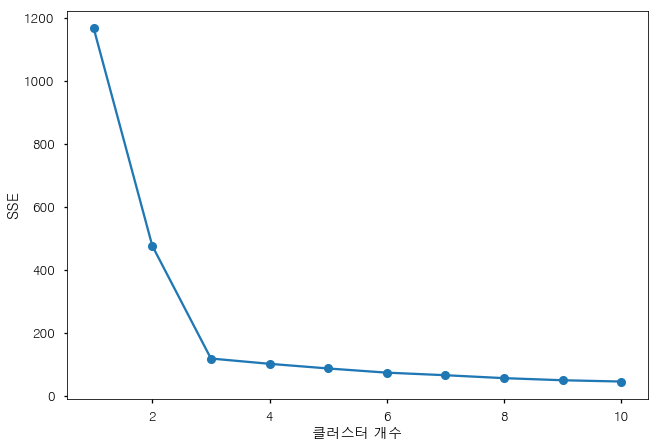

In [23]:
# 최적 클러스터 개수 찾기
# 엘보우 기법

def elbow(X):
    sse = []
    for i in range(1, 11):
        km = KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(X)
        sse.append(km.inertia_)
        
    plt.plot(range(1, 11), sse, marker='o')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt. show()
    
elbow(X)

# 출력 그래프를 보면 클러스터의 개수가 3일 때 팔꿈치 부분이라는 것을 알 수 있습니다.
# 따라서 주어진 데이터를 구분하기 위한 최적의 클러스터의 개수는 3개로 결정하면 됩니다.

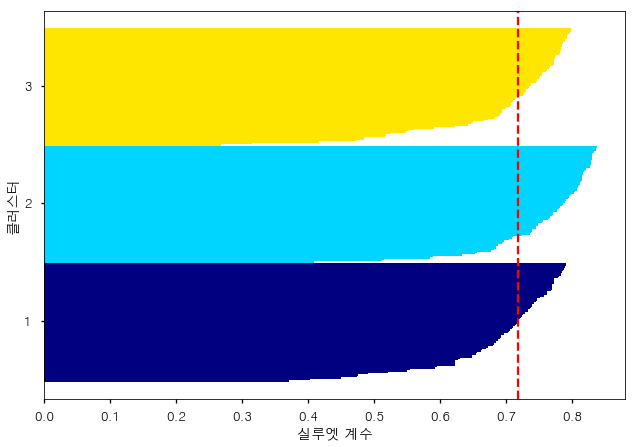

In [37]:
# 최적 클러스터 개수 찾기
# 실루엣 기법

def plotSilhouette(X, y_km):
    # y_km의 고유값을 멤버로 하는 numpy 배열을 cluster_labels로 둡니다.
    # y_km의 고유값 개수는 클러스터의 개수와 동일합니다.
    cluster_labels = np.unique(y_km_sil)
    # 클러스터 개수를 n_cluster로 둡니다.
    n_clusters = cluster_labels.shape[0]
    # 실루엣 계수를 계산하고 그 결과를 silhouette_vals로 둡니다.
    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    
    # plotSilhouette()의 for 구문은 각 클러스터에 속하는 데이터들에 대한
    # 실루렛 값을 수평 막대그래프로 그려주는 로직입니다.
    # 클러스터를 구분하기 위해 matplotlib.cm에서 제공하는 컬러맵 중 JET를 이용해서
    # 칠해줍니다.
    # JET 컬러맵 참조 : 왼쪽 파란색 부분이 0.0 , 오른쪽 빨간색 부분은 1.9 값을 가진다. 
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)
        
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
                edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)
        
    silhouette_avg = np.mean(silhouette_vals)
    # 모든 데이터들의 실루엣 계수의 평균값을 빤간 점선으로 표시합니다.
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('클러스터')
    plt.xlabel('실루엣 계수')
    plt.show()
    
    
#samples = 250
#X, y = make_blobs(n_samples=samples, n_features=2, centers=3, cluster_std=0.5,
#                 shuffle=True, random_state=0)

#init='kmeans++'
km = KMeans(n_clusters=3, random_state=0)
y_km = km_sil.fit_predict(X)
plotSilhouette(X, y_km)

# 클러스터 1~3에 속하는 데이터들의 실루엣 계수가 0으로 된 값이 아무것도 없으며
# 실루엣 계수의 평균이 0.7보다 크므로 잘 분류된 결과라 해도 무방합니다.

In [ ]:
# 엘보우 기법은 k-means 클러스터링에만 유효하지만
# 실루엣 기법은 k-means 클러스터링 이외의 다른 클러스터링에도 적용할 수 있는
# 기법입니다.